In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

In [30]:
uzh_color_map = ['#0028a5', '#dc6027', '#91c34a', '#fede00', '#a3adb7', '#0b82a0', '#2a7f62', # FULL
                 '#667ec9', '#eaa07d', '#bfdf94', '#fcec7c', '#c8ced4', '#6bb7c7', '#80b6a4', # 60%
                 '#3353b7', '#e38052', '#aad470', '#fbe651', '#b5bdc5', '#3c9fb6', '#569d85', # 80%
                 '#99a9db', '#f1bfa9', '#d5e9b7', '#fdf3a8', '#dadee2', '#9ed0d9', '#abcec2', # 40%
                 '#ccd4ed', '#f8dfd4', '#eaf4db', '#fef9d3', '#edeff1', '#cfe8ec', '#d5e7e1'] # 20%

uzh_colors = {'blue': '#0028a5', 'blue_80': '#3353b7', 'blue_60': '#667ec9', 'blue_40': '#99a9db', 'blue_20': '#ccd4ed',
               'red': '#dc6027', 'red_80': '#e38052', 'red_60': '#eaa07d', 'red_40': '#f1bfa9', 'red_20': '#f8dfd4',
               'green': '#91c34a', 'green_80': '#aad470', 'green_60': '#bfdf94', 'green_40': '#d5e9b7', 'green_20': '#eaf4db',
               'yellow': '#fede00', 'yellow_80': '#fbe651', 'yellow_60': '#fcec7c', 'yellow_40': '#fdf3a8', 'yellow_20': '#fef9d3',
               'grey': '#a3adb7', 'grey_80': '#b5bdc5', 'grey_60': '#c8ced4', 'grey_40': '#dadee2', 'grey_20': '#edeff1',
               'turquoise': '#0b82a0', 'turquoise_80': '#3c9fb6', 'turquoise_60': '#6bb7c7', 'turquoise_40': '#9ed0d9', 'turquoise_20': '#cfe8ec',
               'green2': '#2a7f62', 'green2_80': '#569d85', 'green2_60': '#80b6a4', 'green2_40': '#abcec2', 'green2_20': '#d5e7e1'}

font_path = './Fonts/TheSans Plain.otf'
fm.fontManager.addfont(font_path)
prop = fm.FontProperties(fname=font_path)


In [31]:
plt.rcParams.update({
                        'text.usetex': False,
                        'font.family': 'sans-serif',
                        'font.sans-serif' : prop.get_name(),
                        'axes.labelsize' : 16,
                        'font.size' : 12,
                        'mathtext.fontset': 'cm',
                        'axes.unicode_minus': False,
                        'axes.formatter.use_mathtext': True,
                    })

mpl.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=uzh_color_map)


In [32]:
def plot_girvan_newmann_metrics(x, y, xlabel, ylabel, title, colour, save_fig_filepath):
    plt.figure(figsize=(5,5))
    plt.plot(x, y, '-ok', color = uzh_colors[colour])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.minorticks_off()
    plt.tight_layout()
    plt.savefig(save_fig_filepath)
    return


In [33]:
def main(i, wt, modularity_df, save_dir):
    plot_girvan_newmann_metrics(
                                    modularity_df['new_modularity'].index, 
                                    modularity_df['new_modularity'], 
                                    "Iterations \n ({} graph)".format(wt.capitalize()), 
                                    'Modularity', 
                                    'Girvin Newmann Modularity Mapping \n File idx: {}, Component idx: {} \n Original modularity: {}'.format(i, modularity_df['subgraph_index'][0], round(modularity_df['original_modularity'][0], 4)), 
                                    'blue', 
                                    save_dir + 'modularity.png'
                                )
    plot_girvan_newmann_metrics(
                                    modularity_df['count_of_known_entites'].index, 
                                    modularity_df['count_of_known_entites'], 
                                    "Iterations \n ({} graph)".format(wt.capitalize()), 
                                    'count of addresses with known entities', 
                                    'Girvin Newmann count of known entites Mapping \n File idx: {}, Component idx: {} \n Num of unique entities are {} \n Total num of addresses are {}'.format(i, modularity_df['subgraph_index'][0], modularity_df['num_of_unique_entities_in_comp'][0], modularity_df['total_num_of_addresses_in_comp'][0]), 
                                    # 'Girvin Newmann count of known entites Mapping \n Num of unique entities in the component-{} are {} \n Total num of addresses in the component-{} are {}'.format(modularity_df['subgraph_index'][0], modularity_df['num_of_unique_entities_in_comp'][0], modularity_df['subgraph_index'][0], modularity_df['total_num_of_addresses_in_comp'][0]), 
                                    'red', 
                                    save_dir + 'count_of_known_entites.png'
                                )


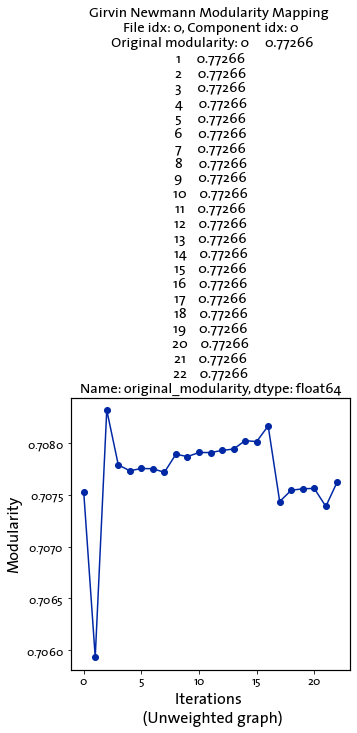

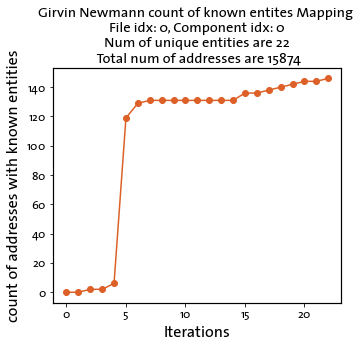

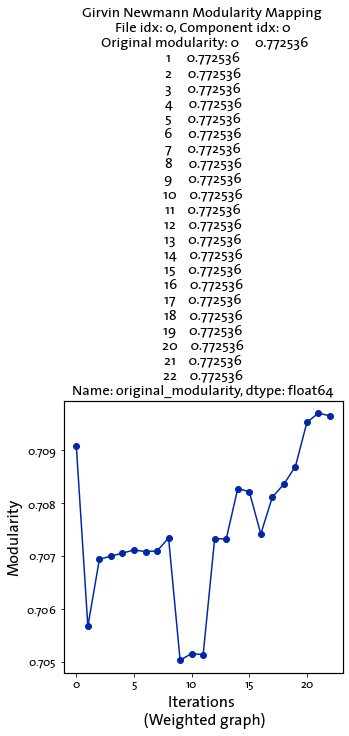

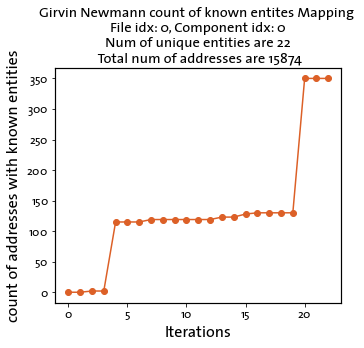

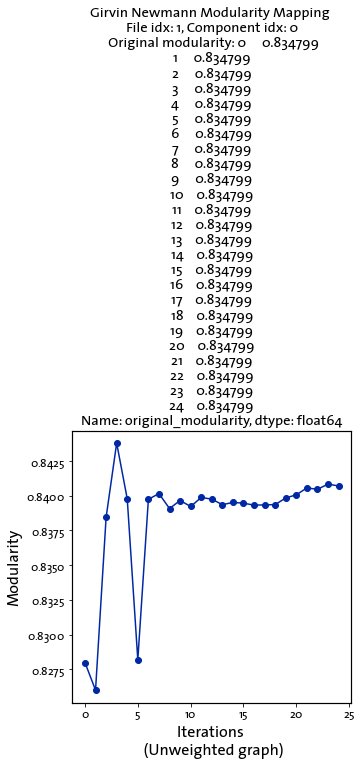

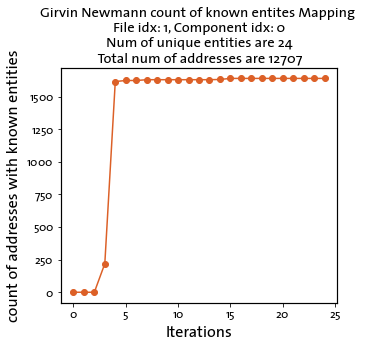

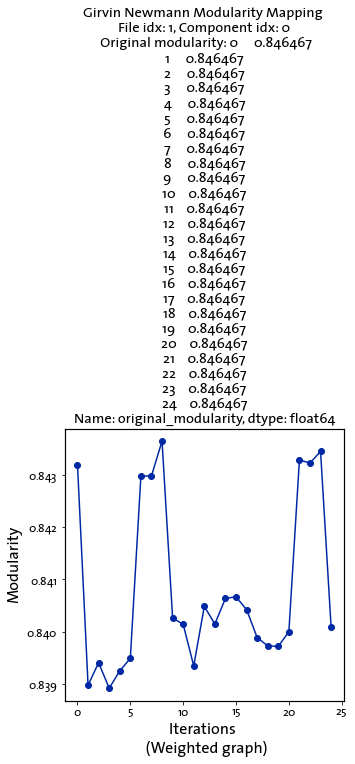

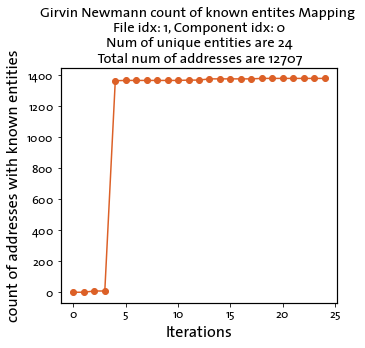

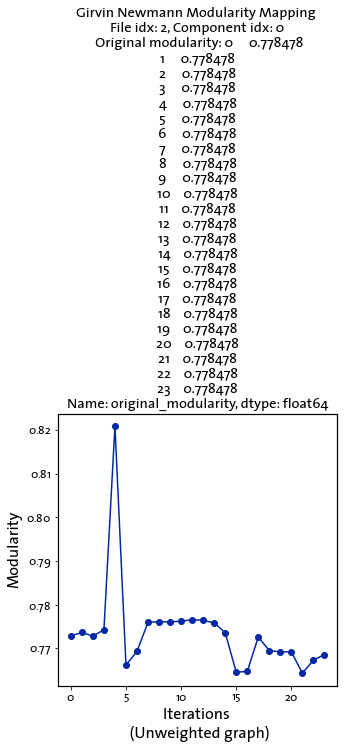

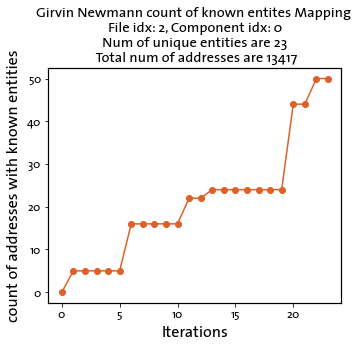

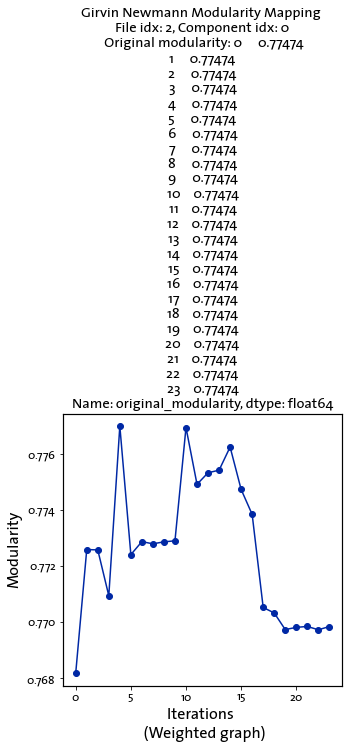

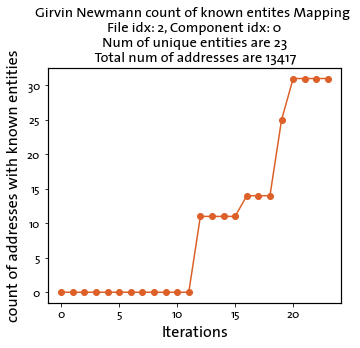

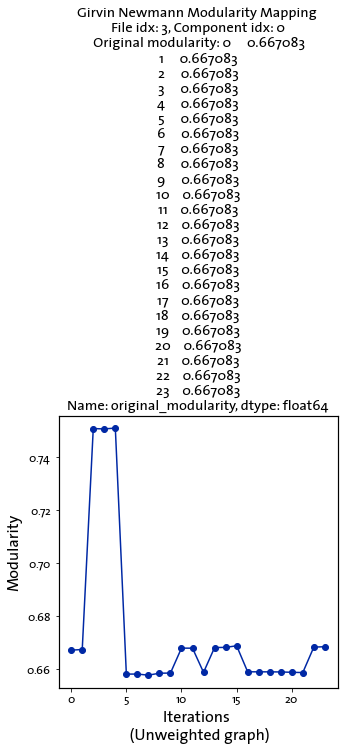

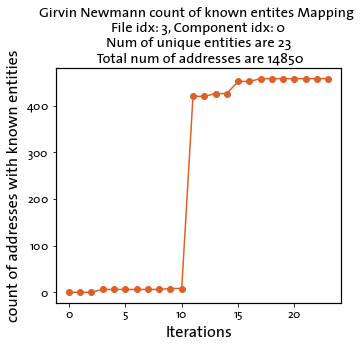

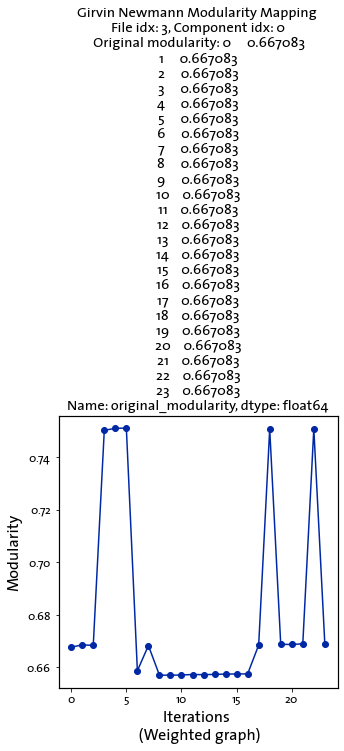

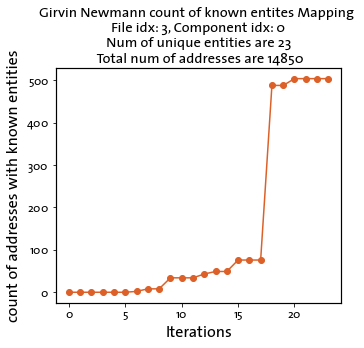

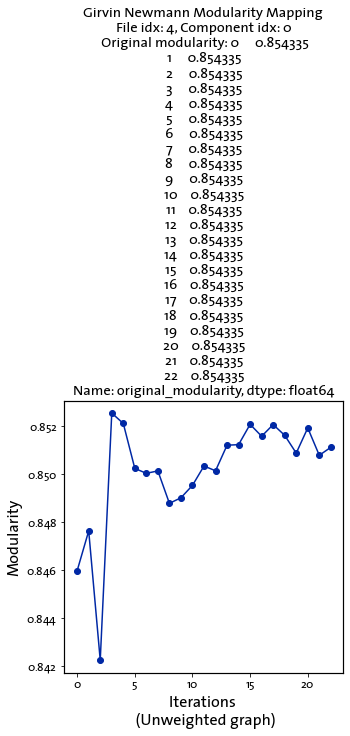

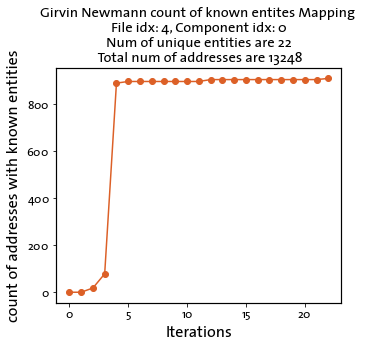

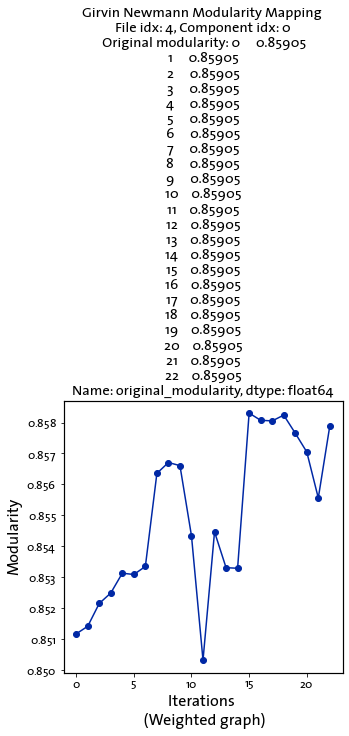

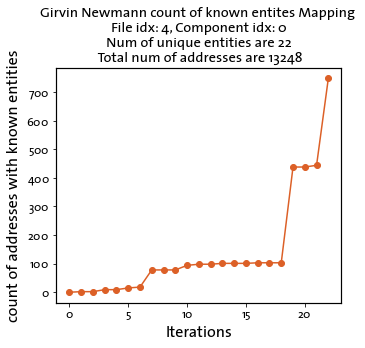

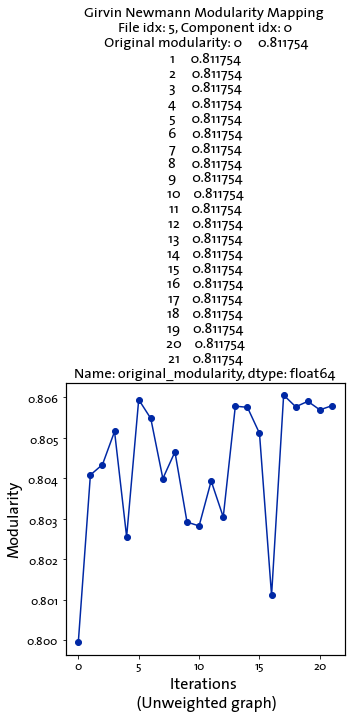

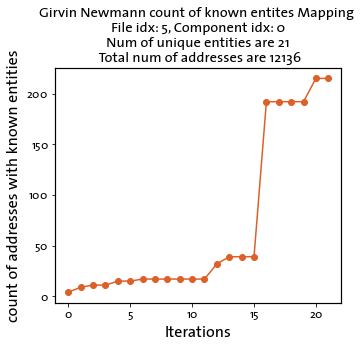

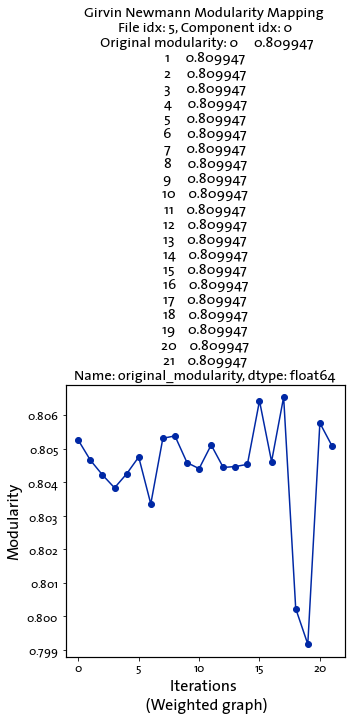

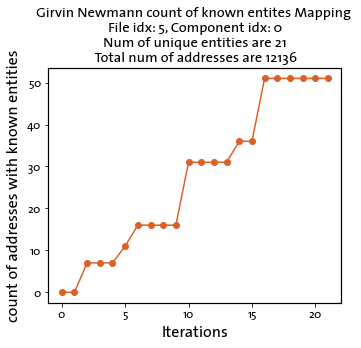

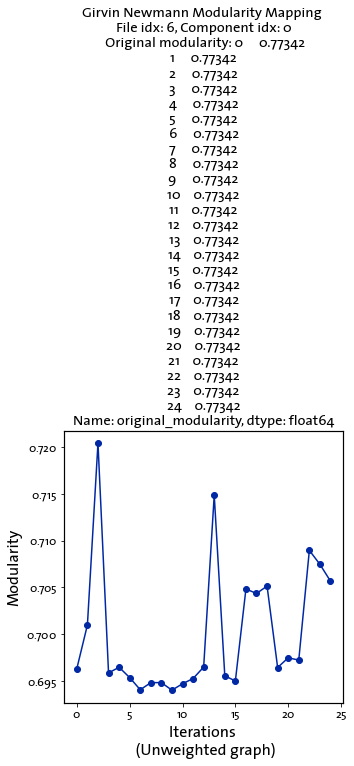

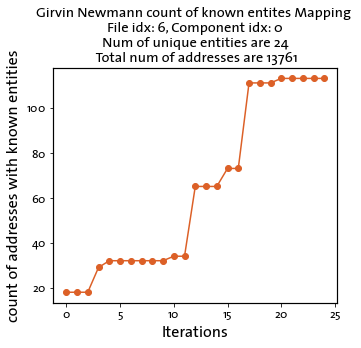

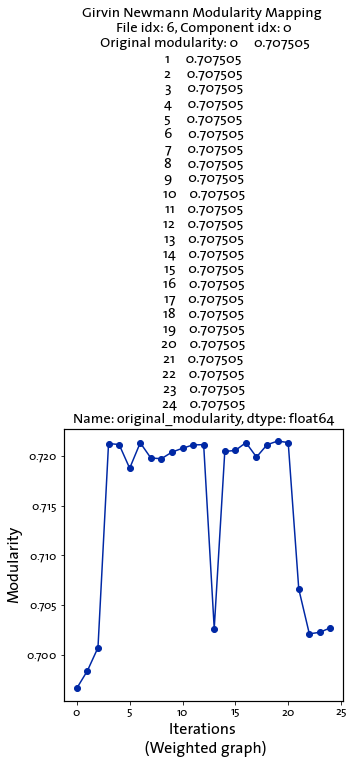

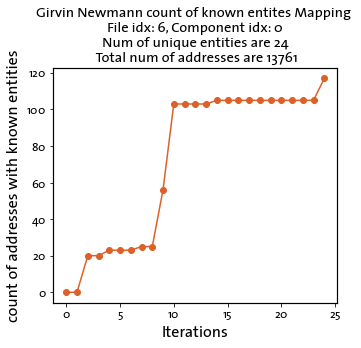

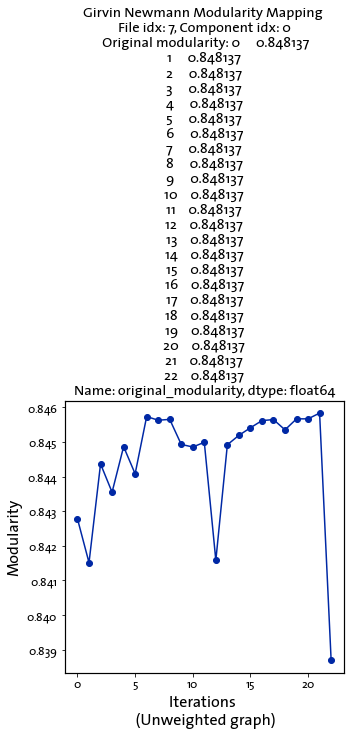

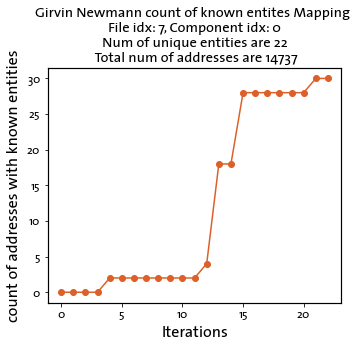

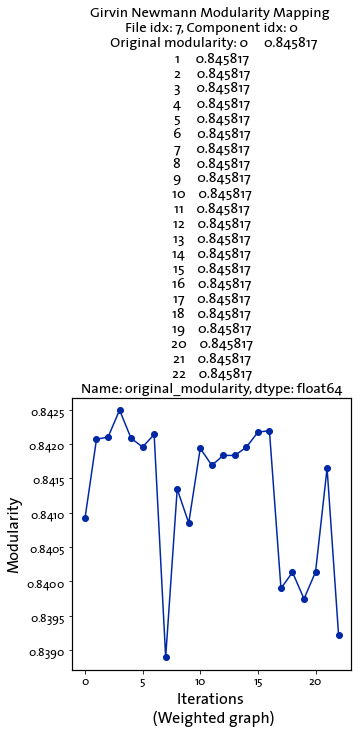

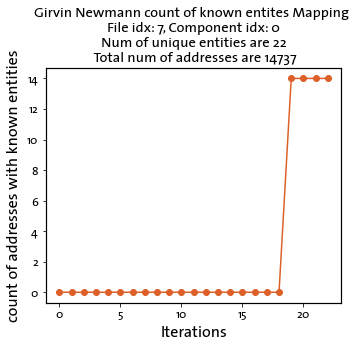

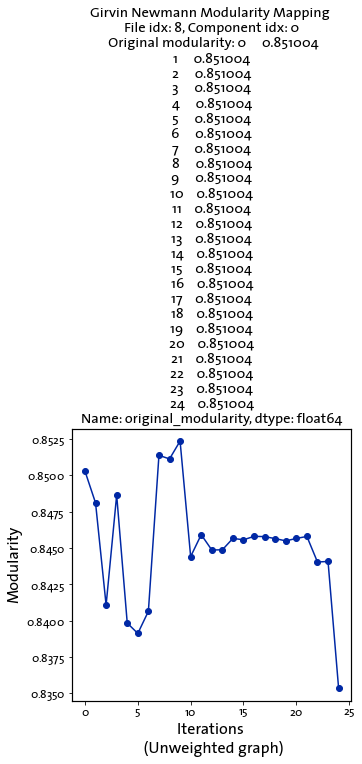

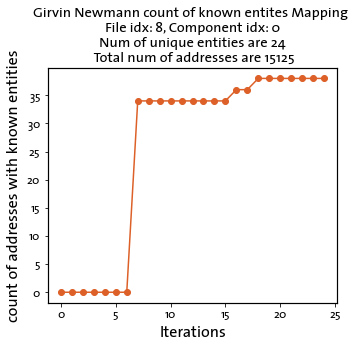

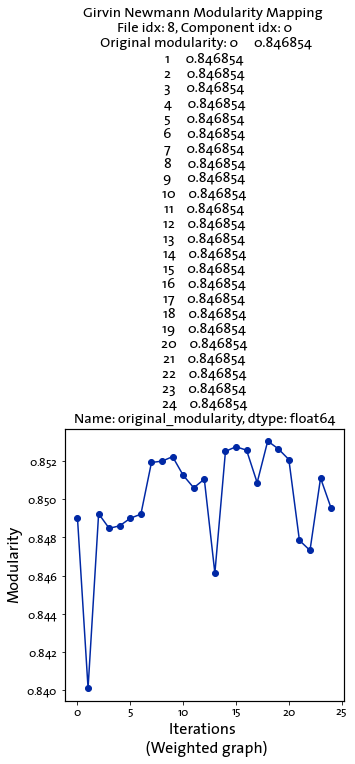

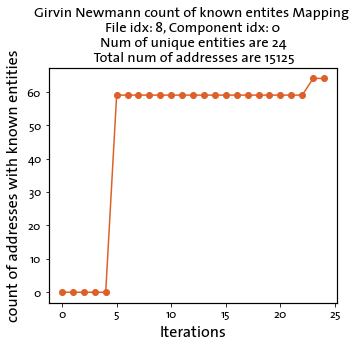

In [34]:

local_logs_path = '/Users/nidhiagrawal/Desktop/Assignments/MastersProject/Github/FINAL/part2_final_logs/gn_logs/'
server_logs_path = '/local/scratch/correspondence_network/part2_final_logs/gn_logs/'
weighted = ['unweighted', 'weighted']

for i in range(9):
    
    dir = local_logs_path + 'btc_2012_' + str(i) + '_logs/'
    
    for wt in weighted:
        
        gen_files_dir = dir + wt + '/' + 'generated_files/'
        fig_dir = dir + wt + '/' + 'figures/'

        all_files = os.listdir(gen_files_dir)
        files = [f for f in all_files if os.path.isfile(gen_files_dir + f)]

        # print('############### ', all_files)
        # print('############### ', files)

        for file in files:
            name = file.replace('modularity.csv', '')
            modularity_df = pd.read_csv(gen_files_dir + file)
            save_dir = fig_dir + name

            main(i, wt, modularity_df, save_dir)



In [35]:

# local_logs_path = '/Users/nidhiagrawal/Desktop/Assignments/MastersProject/Github/FINAL/part2_final_logs/gn_logs/'
# server_logs_path = '/local/scratch/correspondence_network/part2_final_logs/gn_logs/'
# weighted = ['unweighted', 'weighted']

# ent_addrs_dict = {
#                     0 : [22, 15874],
#                     1 : [24, 12707],
#                     2 : [23, 13417],
#                     3 : [23, 14850],
#                     4 : [22, 13248],
#                     5 : [21, 12136],
#                     6 : [24, 13761],
#                     7 : [22, 14737],
#                     8 : [24, 15125],
#                 }

# for i in range(9):
    
#     dir = local_logs_path + 'btc_2012_' + str(i) + '_logs/'
    
#     for wt in weighted:
        
#         gen_files_dir = dir + wt + '/' + 'generated_files/'
#         fig_dir = dir + wt + '/' + 'figures/'

#         all_files = os.listdir(gen_files_dir)
#         files = [f for f in all_files if os.path.isfile(gen_files_dir + f)]

#         print('############### ', all_files)
#         print('############### ', files)

#         for file in files:
#             name = file.replace('modularity.csv', '')
#             modularity_df = pd.read_csv(gen_files_dir + file)
#             save_dir = fig_dir + name

#             modularity_df['num_of_unique_entities_in_comp'] = ent_addrs_dict[i][0]
#             modularity_df['total_num_of_addresses_in_comp'] = ent_addrs_dict[i][1]
#             modularity_df.to_csv(gen_files_dir + file)
            
# modularity_df


